In [1]:
# FIZ A IMPORTAÇÃO DOS PACOTES QUE SERÃO USADOS

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

warnings.filterwarnings('ignore')

In [3]:
# FIZ A LEITURA E ARMAZENAMENTO DA TABELA COM OS MEUS DADOS PARA
# MANIPULADO NO PYTHON/JUPYTER NOTEBOOK

In [4]:
dados = pd.read_csv('dataset.csv')
print("Shape of the data= ", dados.shape)
dados.head()

Shape of the data=  (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# FIZ UMA ORGANIZAÇÃO DOS DADOS NUMA NOVA TABELA, PARA PRESERVAR
# A TABELA ORIGINAL E TIREI ELEMENTOS DA TABELA QUE NÃO VOU USAR
# NA ANÁLISE

In [6]:
df = dados.rename(columns={'track_name':'name' , 'track_id':'id' })
df = df[["acousticness","artists","danceability","duration_ms","energy","explicit","id","instrumentalness","key","liveness","loudness","mode","name","popularity","speechiness","tempo","valence","Unnamed: 0","album_name","time_signature"]]
df = df.drop(columns = ['id', 'name','artists','album_name',"Unnamed: 0","time_signature"])

In [7]:
# DEMONSTRAÇÃO DE COMO ESTÁ A TABELA QUE VOU UTILIZAR 
# OS DADOS NO MOMENTO ATUAL

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      114000 non-null  float64
 1   danceability      114000 non-null  float64
 2   duration_ms       114000 non-null  int64  
 3   energy            114000 non-null  float64
 4   explicit          114000 non-null  bool   
 5   instrumentalness  114000 non-null  float64
 6   key               114000 non-null  int64  
 7   liveness          114000 non-null  float64
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  popularity        114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  valence           114000 non-null  float64
dtypes: bool(1), float64(9), int64(4)
memory usage: 11.4 MB


In [9]:
# ESTOU CONFERINDO SE NÃO TEM VALOR NULL EM DADOS NA TABELA

In [10]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
dtype: int64

In [11]:
# VOU FAZER UM PROCESSO DE NORMALIZAÇÃO DOS DADOS COMEÇANDO POR
# CONVERTER OS VALORES "FALSE" "TRUE" EM 0 E 1

In [12]:
# CONVERTENDO EXPLICIT EM VALORES NUMÉRICOS

In [13]:
X = df
y = df['explicit']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['explicit'] = le.fit_transform(X['explicit'])

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      114000 non-null  float64
 1   danceability      114000 non-null  float64
 2   duration_ms       114000 non-null  int64  
 3   energy            114000 non-null  float64
 4   explicit          114000 non-null  int64  
 5   instrumentalness  114000 non-null  float64
 6   key               114000 non-null  int64  
 7   liveness          114000 non-null  float64
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  popularity        114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  valence           114000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 12.2 MB


In [16]:
# DEMONSTRANDO A TRANSFORMAÇÃO DO VALOR EXPLICIT DE BOOLEANO
# ( FALSE/ TRUE) EM INTEIRO (0 E 1)

In [17]:
X.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.0322,0.676,230666,0.4610,0,0.000001,1,0.3580,-6.746,0,73,0.1430,87.917,0.715
1,0.9240,0.420,149610,0.1660,0,0.000006,1,0.1010,-17.235,1,55,0.0763,77.489,0.267
2,0.2100,0.438,210826,0.3590,0,0.000000,0,0.1170,-9.734,1,57,0.0557,76.332,0.120
3,0.9050,0.266,201933,0.0596,0,0.000071,0,0.1320,-18.515,1,71,0.0363,181.740,0.143
4,0.4690,0.618,198853,0.4430,0,0.000000,2,0.0829,-9.681,1,82,0.0526,119.949,0.167


In [18]:
# FAZENDO A NORMALIZAÇÃO DOS DADOS DA TABELA USANDO O MÉTODO MINMAXSCALER

In [19]:
cols = X.columns

In [20]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X= ms.fit_transform(X)

In [21]:
X = pd.DataFrame(X, columns = [cols])

In [22]:
# VERIFICANDO SE OS DADOS FORAM NORMALIZADOS 

In [23]:
X.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.032329,0.686294,0.044043,0.4610,0.0,0.000001,0.090909,0.3580,0.791392,0.0,0.73,0.148187,0.361245,0.718593
1,0.927711,0.426396,0.028566,0.1660,0.0,0.000006,0.090909,0.1010,0.597377,1.0,0.55,0.079067,0.318397,0.268342
2,0.210843,0.444670,0.040255,0.3590,0.0,0.000000,0.000000,0.1170,0.736123,1.0,0.57,0.057720,0.313643,0.120603
3,0.908635,0.270051,0.038557,0.0596,0.0,0.000071,0.000000,0.1320,0.573701,1.0,0.71,0.037617,0.746758,0.143719
4,0.470884,0.627411,0.037969,0.4430,0.0,0.000000,0.181818,0.0829,0.737103,1.0,0.82,0.054508,0.492863,0.167839


In [24]:
# METODO DO COTOVELO

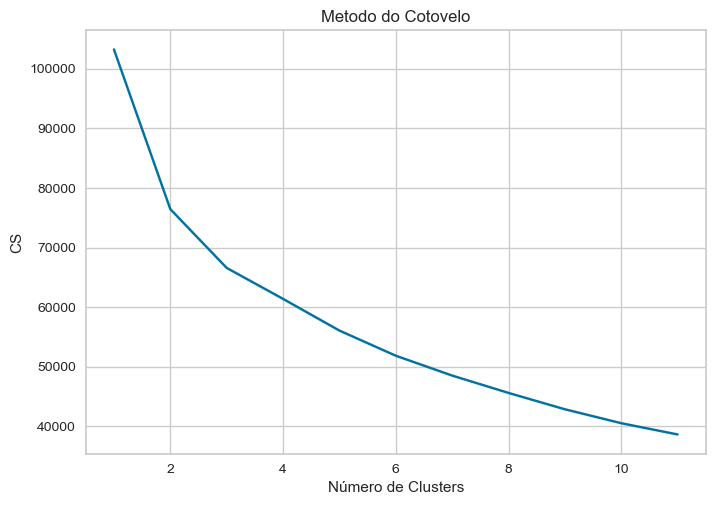

In [25]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('Metodo do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('CS')
plt.show()

In [26]:
# MÉTODO DA SILHUETA

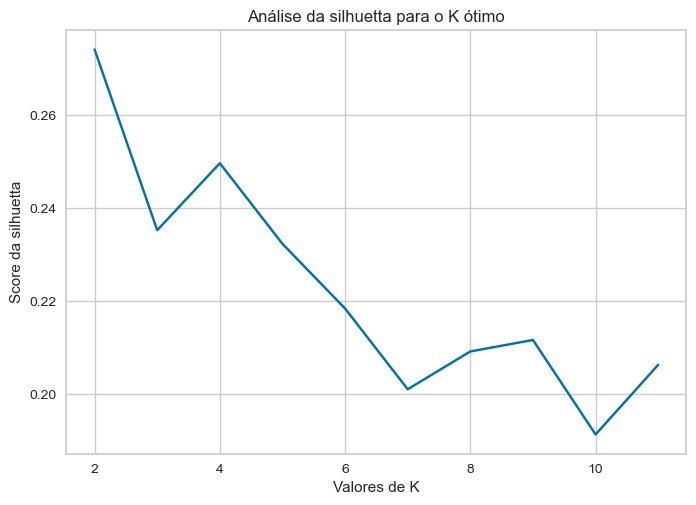

In [27]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Valores de K") 
plt.ylabel("Score da silhuetta") 
plt.title("Análise da silhuetta para o K ótimo")
plt.show()

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

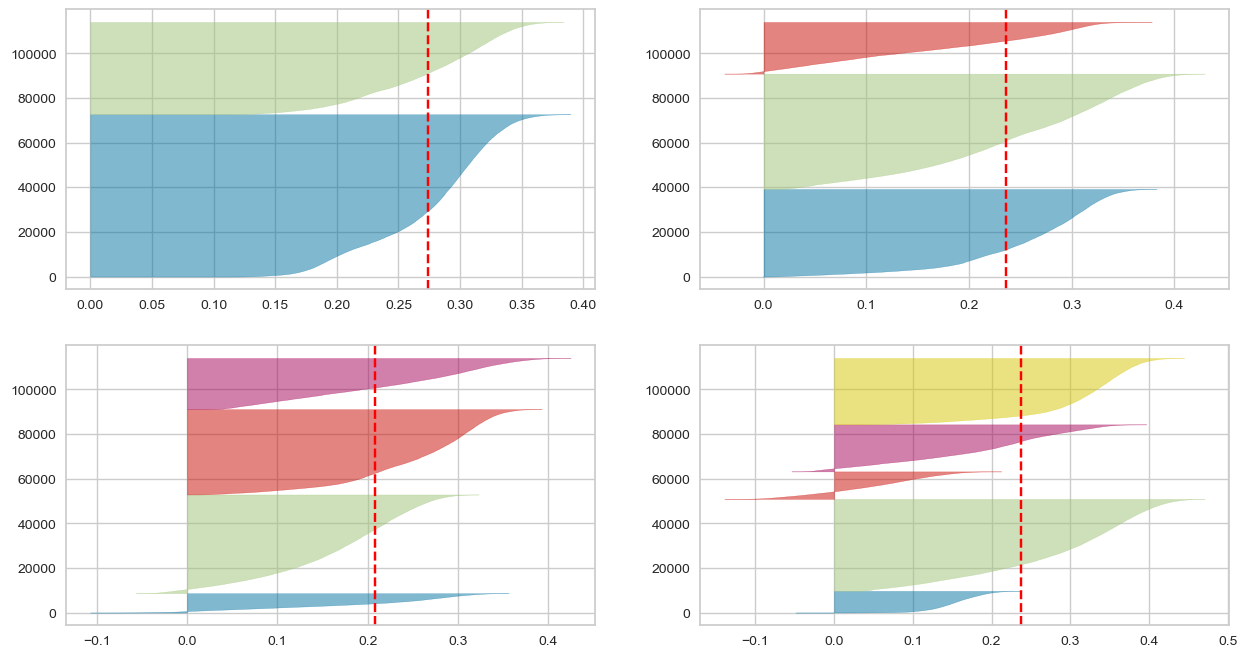

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [30]:
# SALVANDO O TIPO DE CLUSTER DE CADA MÚSICA NUMA NOVA COLUNA NA TABELA ORIGINAL

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=42)
features = kmeans.fit_predict(X)

In [32]:
dados['cluster'] = features

In [33]:
# CONFERINDO A NOVA TABELA COM A ADIÇÃO DA COLUNA DE CLUSTER

In [34]:
dados

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,2
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,3
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,2
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,3


In [35]:
# EXIBINDO A QUANTIDADE DE MUSICAS EM CADA CLUSTER

In [36]:
print('Número de músicas por Cluster = \n', dados['cluster'].value_counts())

Número de músicas por Cluster = 
 1    44218
2    38207
3    22908
0     8667
Name: cluster, dtype: int64


In [ ]:
# EXPORTANDO OS DADOS GERADOS PARA UMA PLANILHA DO EXCEL 

In [ ]:
dados.to_excel('Musicas_Cluster.xlsx')